# Satellite observation : channels images (VIS, WV and IR)

The aim of this notebook is to indicate how to read the satellite data. They differenciate into 4 categories:
<ul>
    <li>'VIS06' : visible channel (0.6 µm)</li>
    <li>'IR_039' : infrared channel (3.9 µm)</li>
    <li>'IRG108' : infrared channel (10.8 µm)</li>
    <li>'WV062' : water vapor channel (6.2 µm)</li>    
</ul>

The time step is 15 minutes, the spatial resolution, 3km. Each file contains for a time step, a channel and one geograhic zone ('NW' for North-West of France or 'SE' for South-East of France). The missing values are -32 267. The units are not the same according to the channels:
<ul>
    <li>About 'VIS06', the data are the toa (top of the atmosphere) bidirectional reflectances, in % </li>
    <li>About the others, IR and WV, the data are the toa brightness temperatures, in Kelvins </li>
</ul>

/!\The visible channel is by definition not visible at night; there are huge gaps of distribution between the day and night and a lot of missing values for this channel.


In [1]:
from data_exploration.utils.user_configuration import DOMAINS,n_epsg
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 


In [2]:
####Cell containing the modifiable fields######
zone = 'NW'   #geographic zone
channel = "VIS06"

In [3]:
fpath = "../data_sample/satellite/%s_%s_201601011200.npz"%(channel,zone)
title = "Channel %s - day 20160101 12H00 - zone %s "%(channel,zone)

In [4]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

## Function to make a plot with Coastline using basemap 

In [5]:
#data loading
def plot_figure(fname,title):
    d = np.load(fname,allow_pickle=True)
    d.files      #know the compressed file structure
    data=d['arr_0']
    fig,ax=plt.subplots(1,1,figsize=(7,7))
    #background map definition : 
    m = Basemap(epsg=n_epsg, # Projection type 
                resolution='h', # resolution of coastlines
                llcrnrlat=lllat, #  Coordinates of corners 
                urcrnrlat=urlat, 
                llcrnrlon=lllon,
                urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)

    if channel=='VIS06':
        label_colorbar = 'toa bidirectional reflectance (in %)'
    else:
        label_colorbar = 'toa brightness temperature (in K)'
    m.drawcoastlines()
    m.drawcountries()
    img=m.imshow(data, interpolation='none', origin='upper')
    plt.colorbar(img,orientation= 'horizontal').set_label(label_colorbar)
    plt.title(title)
    plt.show()

Overview of data of type int16

<IPython.core.display.Javascript object>


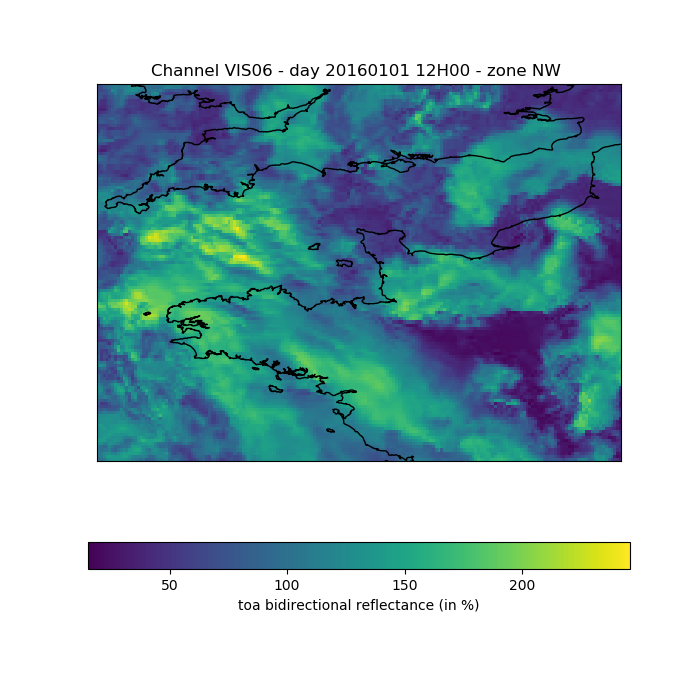

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [6]:
plot_figure(fpath,title)